#**Using Pycaret to develop a liked-song classifier using my Spotify Listenting history and liked songs dataset.**
<br>

####This classifier will be built using the features of each song that can be obtained from the Spotipy API: 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness','tempo', 'liveness', 'valence', 'duration', 'label'


#### Turns out the merged datasets results in a very imbalanaced dataset. Few liked songs relative to songs I listented to and didn't like. I will do some EDA and unsupervised tasks on features such as genres, time of day, playing time etc. in another notebook


#### I am going to prioritize Precision as a model metric, because this is one of the most important metrics here for this task (it's okay to not reccomend every song that is liked, so long as the ones that it classifies as liked are reliable or accurate )

In [236]:
!pip install -r requirements.txt

In [237]:
import pandas as pd
import numpy as np
import altair as alt
from pycaret.classification import *

In [238]:
dataset = pd.read_csv('full_clf_df.csv')

In [239]:
pycaret.__version__

'2.3.5'

In [240]:
dataset.columns


Index(['Unnamed: 0', 'artistName', 'trackName', 'msPlayed', 'genres',
       'danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'tempo', 'liveness', 'valence', 'duration', 'id', 'label'],
      dtype='object')

In [241]:
dataset = dataset[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'tempo', 'liveness', 'valence', 'duration', 'label']] 

In [242]:
data = dataset.sample(frac=0.95, random_state=786)
unseen_data2 = dataset.drop(data.index)
dataset.reset_index(inplace=True, drop=True)
unseen_data2.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(unseen_data2.shape))

Data for Modeling: (5895, 10)
Unseen Data For Predictions: (310, 10)


In [243]:
results_master = []
exp_clf101 = setup(data = data, target = 'label', session_id=123,) 


,Description,Value
0,session_id,123
1,Target,label
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(5895, 10)"
5,Missing Values,True
6,Numeric Features,9
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [244]:
best_models = compare_models(exclude=['qda','lda'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8941,0.4633,0.0000,0.0000,0.0000,0.0000,0.0000,0.492
nb,Naive Bayes,0.8941,0.5888,0.0000,0.0000,0.0000,0.0000,0.0000,0.050
ridge,Ridge Classifier,0.8941,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.040
rf,Random Forest Classifier,0.8941,0.5779,0.0000,0.0000,0.0000,0.0000,0.0000,1.670
dummy,Dummy Classifier,0.8941,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.018
et,Extra Trees Classifier,0.8936,0.5785,0.0000,0.0000,0.0000,-0.0010,-0.0034,0.784
gbc,Gradient Boosting Classifier,0.8934,0.6012,0.0046,0.2000,0.0090,0.0057,0.0222,1.295
ada,Ada Boost Classifier,0.8929,0.5912,0.0045,0.0833,0.0086,0.0045,0.0094,0.447
lightgbm,Light Gradient Boosting Machine,0.8907,0.5944,0.0023,0.0500,0.0043,-0.0030,-0.0066,0.187
knn,K Neighbors Classifier,0.8854,0.4985,0.0069,0.0625,0.0123,-0.0060,-0.0106,0.169


In [245]:
original_model_gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8910,0.5737,0.0000,0.0,0.0000,-0.0048,-0.0170
1,0.8935,0.5769,0.0000,0.0,0.0000,0.0000,0.0000
2,0.8935,0.5724,0.0000,0.0,0.0000,0.0000,0.0000
3,0.8935,0.6083,0.0000,0.0,0.0000,0.0000,0.0000
4,0.8959,0.6170,0.0227,1.0,0.0444,0.0399,0.1427
5,0.8935,0.5823,0.0000,0.0,0.0000,0.0000,0.0000
6,0.8956,0.5670,0.0000,0.0,0.0000,0.0000,0.0000
7,0.8981,0.6966,0.0233,1.0,0.0455,0.0409,0.1445
8,0.8908,0.6158,0.0000,0.0,0.0000,-0.0094,-0.0238
9,0.8883,0.6018,0.0000,0.0,0.0000,-0.0094,-0.0242


In [246]:
tuned_original_model_gbc = tune_model(original_model_gbc,optimize='precision')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8571,0.5475,0.0455,0.1053,0.0635,-0.0008,-0.0009
1,0.8741,0.5567,0.0455,0.1667,0.0714,0.0270,0.0337
2,0.8741,0.5449,0.0227,0.1000,0.0370,-0.0025,-0.0033
3,0.8838,0.6066,0.0455,0.2500,0.0769,0.0456,0.0654
4,0.8571,0.6264,0.0909,0.1739,0.1194,0.0499,0.0530
5,0.8547,0.5836,0.0227,0.0556,0.0323,-0.0316,-0.0353
6,0.8641,0.5661,0.0465,0.1176,0.0667,0.0080,0.0090
7,0.8762,0.6140,0.0465,0.1667,0.0727,0.0285,0.0353
8,0.8859,0.5688,0.0698,0.3000,0.1132,0.0768,0.1009
9,0.8738,0.6007,0.0455,0.1667,0.0714,0.0269,0.0336


In [247]:
data['label'].value_counts()

0    5250
1     645
Name: label, dtype: int64

# Clearly Imbalanced data

### The dataset is quite imbalanced, which is probably leading to very poor recall scores for all of the models. This is also why the accuracy for the dummy classifier is extremely high. GBC model has a good precision result, but the model is likely missing many positive instances.
<br> 
### I am going to try some different techniques here to rebalance the dataset and try to improve the model metrics.

# upsampling Minority class

In [248]:
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
df = data.copy()

# Separate input features and target
y = df['label']
X = df.drop('label', axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=27)

# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
not_liked = X[X.label==0]
liked = X[X.label==1]

# upsample minority
liked_upsampled = resample(liked,
                          replace=True, # sample with replacement
                          n_samples=len(not_liked), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_liked, liked_upsampled])

upsampled = upsampled.sample(frac=1)
# check new class counts
upsampled.label.value_counts()



1    4989
0    4989
Name: label, dtype: int64

In [249]:
clf_upsampled_data = setup(data = upsampled, target = 'label', session_id=123) 

,Description,Value
0,session_id,123
1,Target,label
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(9978, 10)"
5,Missing Values,True
6,Numeric Features,9
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [250]:
best_models = compare_models(exclude=['qda','lda'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9969,0.9986,0.9954,0.9983,0.9968,0.9937,0.9937,0.815
rf,Random Forest Classifier,0.9875,0.9987,0.9954,0.9800,0.9876,0.9751,0.9753,1.575
dt,Decision Tree Classifier,0.9170,0.9172,0.9966,0.8596,0.9229,0.8340,0.8448,0.064
lightgbm,Light Gradient Boosting Machine,0.9046,0.9756,0.9690,0.8582,0.9102,0.8093,0.8163,0.177
knn,K Neighbors Classifier,0.7845,0.8767,0.9340,0.7185,0.8121,0.5693,0.5967,0.137
gbc,Gradient Boosting Classifier,0.7281,0.8106,0.8255,0.6902,0.7516,0.4565,0.4659,1.187
ada,Ada Boost Classifier,0.6561,0.7187,0.7407,0.6327,0.6822,0.3124,0.3174,0.363
ridge,Ridge Classifier,0.6007,0.0000,0.7097,0.5815,0.6392,0.2018,0.2071,0.021
nb,Naive Bayes,0.5828,0.6342,0.8995,0.5500,0.6826,0.1669,0.2156,0.023
lr,Logistic Regression,0.5411,0.5833,0.7025,0.5347,0.5994,0.0829,0.0839,0.044


In [251]:
rf = create_model('rf')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9928,0.9986,0.9971,0.9886,0.9928,0.9857,0.9857
1,0.9871,0.9992,0.9885,0.9857,0.9871,0.9742,0.9743
2,0.9928,0.9981,0.9971,0.9886,0.9929,0.9857,0.9857
3,0.9871,0.9978,0.9943,0.9802,0.9872,0.9742,0.9743
4,0.9828,1.0000,1.0000,0.9667,0.9831,0.9656,0.9662
5,0.9900,1.0000,1.0000,0.9803,0.9900,0.9799,0.9801
6,0.9828,0.9953,0.9856,0.9800,0.9828,0.9656,0.9656
7,0.9828,1.0000,1.0000,0.9667,0.9831,0.9656,0.9662
8,0.9871,1.0000,1.0000,0.9748,0.9872,0.9742,0.9745
9,0.9900,0.9978,0.9914,0.9885,0.9900,0.9799,0.9799


In [252]:
tuned_rf = tune_model(rf,optimize='precision') # tuning on held out test set
tuned_rf = ensemble_model(tuned_rf, method = 'Bagging')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6924,0.7644,0.8448,0.6462,0.7323,0.3856,0.4050
1,0.7053,0.7826,0.8625,0.6558,0.7450,0.4109,0.4328
2,0.6767,0.7490,0.8453,0.6317,0.7230,0.3537,0.3757
3,0.6881,0.7444,0.8252,0.6472,0.7254,0.3765,0.3915
4,0.6848,0.7701,0.8621,0.6356,0.7317,0.3703,0.3961
5,0.6676,0.7604,0.8362,0.6245,0.7150,0.3359,0.3569
6,0.6834,0.7516,0.8362,0.6396,0.7248,0.3673,0.3859
7,0.6777,0.7455,0.8046,0.6407,0.7134,0.3558,0.3679
8,0.7063,0.7694,0.8592,0.6571,0.7447,0.4131,0.4340
9,0.6877,0.7762,0.8649,0.6377,0.7341,0.3760,0.4022


In [253]:
from pycaret.utils import check_metric
results_dict = {}
results_dict['method'] = 'upsample'
results_dict['model'] = 'tuned_rf'
unseen_data = pd.concat([X_test,y_test], axis=1)
unseen_predictions = predict_model(tuned_rf, data=unseen_data)
print(check_metric(unseen_predictions['label'], unseen_predictions['Label'], metric = 'Accuracy'))
print(check_metric(unseen_predictions['label'], unseen_predictions['Label'], metric = 'Precision'))
results_dict['acc1'] = check_metric(unseen_predictions['label'], unseen_predictions['Label'], metric = 'Accuracy')
results_dict['prec1'] = check_metric(unseen_predictions['label'], unseen_predictions['Label'], metric = 'Precision')

unseen_predictions = predict_model(tuned_rf, data=unseen_data2)
print(check_metric(unseen_predictions['label'], unseen_predictions['Label'], metric = 'Accuracy'))
print(check_metric(unseen_predictions['label'], unseen_predictions['Label'], metric = 'Precision'))

results_dict['acc2'] = check_metric(unseen_predictions['label'], unseen_predictions['Label'], metric = 'Accuracy')
results_dict['prec2'] = check_metric(unseen_predictions['label'], unseen_predictions['Label'], metric = 'Precision')

results_master.append(results_dict)

0.5864
0.1667
0.5452
0.1667


### The results from the upsampled dataframe are now showing a serious overfitting issue! What appears to be happening is the upsampled data in the CV folds is leaking into the validation folds test sets. Do not use CV folds with upsampling, unless you can your modify your CV strategy to eliminate leakage. I won't be able to modify the CV strategy using pycaret as such, and will thus try some different strategies next, before abandoning the CV folds strategy and just using a train/validation/test split.

# Downsampling majority class

In [254]:
df = data.copy()

# Separate input features and target
y = df['label']
X = df.drop('label', axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=27)

# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
not_liked = X[X.label==0]
liked = X[X.label==1]

# upsample minority
not_liked_down_sampled = resample(not_liked,
                          replace=True, # sample with replacement
                          n_samples=len(liked), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
downsampled = pd.concat([liked, not_liked_down_sampled])

downampled = downsampled.sample(frac=1)
# check new class counts
downsampled.label.value_counts()

1    611
0    611
Name: label, dtype: int64

In [255]:
clf_upsampled_data = setup(data = downsampled, target = 'label', session_id=123) 

,Description,Value
0,session_id,123
1,Target,label
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(1222, 10)"
5,Missing Values,False
6,Numeric Features,9
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [256]:
best_models = compare_models(exclude=['qda','lda'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.5906,0.6329,0.5992,0.5865,0.5903,0.1815,0.1831,0.495
gbc,Gradient Boosting Classifier,0.5873,0.6178,0.6279,0.5772,0.5992,0.1753,0.1774,0.221
lightgbm,Light Gradient Boosting Machine,0.5826,0.6168,0.5874,0.5796,0.5823,0.1652,0.1658,0.105
rf,Random Forest Classifier,0.5780,0.6310,0.5834,0.5725,0.5762,0.1564,0.1574,0.566
ridge,Ridge Classifier,0.5778,0.0000,0.6300,0.5674,0.5956,0.1564,0.1586,0.016
dt,Decision Tree Classifier,0.5742,0.5743,0.5709,0.5683,0.5653,0.1485,0.1505,0.021
nb,Naive Bayes,0.5707,0.6201,0.8349,0.5440,0.6582,0.1454,0.1731,0.017
ada,Ada Boost Classifier,0.5639,0.6033,0.6111,0.5524,0.5770,0.1285,0.1311,0.133
lr,Logistic Regression,0.5134,0.5998,0.8910,0.5079,0.6382,0.0328,0.0345,0.022
dummy,Dummy Classifier,0.5041,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.012


## Looks like we elimanated our overfitting problem, but we lost quite a bit of predictive power. The dataset was reduced quite a bit in downsampling, so maybe we can strike a balance here and improve our predictive power. Right now the best classifer is only moderately better than the dummy classifier.

## First let's see if we can get a boost from tuning our hyperparameters


In [257]:
ridge = create_model('ridge')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6512,0.0,0.7857,0.6111,0.6875,0.3065,0.3190
1,0.6279,0.0,0.6512,0.6222,0.6364,0.2558,0.2561
2,0.4651,0.0,0.5581,0.4706,0.5106,-0.0698,-0.0710
3,0.6163,0.0,0.6279,0.6136,0.6207,0.2326,0.2326
4,0.5233,0.0,0.5581,0.5217,0.5393,0.0465,0.0466
5,0.6118,0.0,0.7143,0.5882,0.6452,0.2254,0.2306
6,0.5647,0.0,0.5476,0.5610,0.5542,0.1291,0.1291
7,0.5647,0.0,0.6905,0.5472,0.6105,0.1319,0.1366
8,0.5882,0.0,0.6190,0.5778,0.5977,0.1770,0.1775
9,0.5647,0.0,0.5476,0.5610,0.5542,0.1291,0.1291


In [258]:
tuned_ridge = tune_model(ridge,optimize='precision')
tuned_ridge = ensemble_model(tuned_ridge, method = 'Bagging')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6628,0.7213,0.7857,0.6226,0.6947,0.3292,0.3404
1,0.6512,0.7020,0.6512,0.6512,0.6512,0.3023,0.3023
2,0.5349,0.5452,0.6512,0.5283,0.5833,0.0698,0.0717
3,0.6279,0.6858,0.6047,0.6341,0.6190,0.2558,0.2561
4,0.5233,0.5187,0.5349,0.5227,0.5287,0.0465,0.0465
5,0.5882,0.6182,0.7381,0.5636,0.6392,0.1793,0.1883
6,0.5647,0.5545,0.5238,0.5641,0.5432,0.1286,0.1289
7,0.5647,0.5963,0.6905,0.5472,0.6105,0.1319,0.1366
8,0.5882,0.5720,0.5952,0.5814,0.5882,0.1766,0.1766
9,0.5176,0.5573,0.5000,0.5122,0.5060,0.0349,0.0349


In [259]:
predict_model(tuned_ridge);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.5804,0.6046,0.6096,0.5846,0.5969,0.1598,0.1599


In [260]:
results_dict = {}
results_dict['method'] = 'downsample'
results_dict['model'] = 'tuned_ridge'

unseen_predictions = predict_model(tuned_ridge, data=unseen_data)
print(check_metric(unseen_predictions['label'], unseen_predictions['Label'], metric = 'Accuracy'))
print(check_metric(unseen_predictions['label'], unseen_predictions['Label'], metric = 'Precision'))
results_dict['acc1'] = check_metric(unseen_predictions['label'], unseen_predictions['Label'], metric = 'Accuracy')
results_dict['prec1'] = check_metric(unseen_predictions['label'], unseen_predictions['Label'], metric = 'Precision')

unseen_predictions = predict_model(tuned_ridge, data=unseen_data2)
print(check_metric(unseen_predictions['label'], unseen_predictions['Label'], metric = 'Accuracy'))
print(check_metric(unseen_predictions['label'], unseen_predictions['Label'], metric = 'Precision'))

results_dict['acc2'] = check_metric(unseen_predictions['label'], unseen_predictions['Label'], metric = 'Accuracy')
results_dict['prec2'] = check_metric(unseen_predictions['label'], unseen_predictions['Label'], metric = 'Precision')

results_master.append(results_dict)

0.5627
0.1631
0.5613
0.1724


In [261]:
ada = create_model('ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5233,0.5944,0.5714,0.5106,0.5393,0.0486,0.0489
1,0.5465,0.5930,0.5814,0.5435,0.5618,0.0930,0.0933
2,0.5698,0.5498,0.6279,0.5625,0.5934,0.1395,0.1405
3,0.5116,0.6076,0.3721,0.5161,0.4324,0.0233,0.0242
4,0.5698,0.5895,0.7442,0.5517,0.6337,0.1395,0.1489
5,0.6118,0.6802,0.7381,0.5849,0.6526,0.2258,0.2337
6,0.5294,0.5900,0.5238,0.5238,0.5238,0.0587,0.0587
7,0.5765,0.6127,0.6667,0.5600,0.6087,0.1547,0.1575
8,0.6353,0.6243,0.7143,0.6122,0.6593,0.2719,0.2756
9,0.5647,0.5919,0.5714,0.5581,0.5647,0.1295,0.1296


In [262]:
tuned_ada = tune_model(ada,optimize='precision')
tuned_ada = ensemble_model(tuned_ada, method = 'Bagging')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5465,0.6163,0.6905,0.5273,0.5979,0.0989,0.1037
1,0.5814,0.6696,0.5814,0.5814,0.5814,0.1628,0.1628
2,0.5465,0.5533,0.6279,0.5400,0.5806,0.0930,0.0943
3,0.6047,0.6274,0.4884,0.6364,0.5526,0.2093,0.2152
4,0.5465,0.5641,0.6279,0.5400,0.5806,0.0930,0.0943
5,0.5765,0.6451,0.6667,0.5600,0.6087,0.1547,0.1575
6,0.5294,0.5692,0.5000,0.5250,0.5122,0.0582,0.0582
7,0.5882,0.6190,0.6905,0.5686,0.6237,0.1784,0.1825
8,0.6118,0.6069,0.6667,0.5957,0.6292,0.2245,0.2261
9,0.5647,0.5819,0.5476,0.5610,0.5542,0.1291,0.1291


In [263]:
results_dict = {}
results_dict['method'] = 'upsample'
results_dict['model'] = 'tuned_ada'

unseen_predictions = predict_model(tuned_ada, data=unseen_data)
print(check_metric(unseen_predictions['label'], unseen_predictions['Label'], metric = 'Accuracy'))
print(check_metric(unseen_predictions['label'], unseen_predictions['Label'], metric = 'Precision'))
results_dict['acc1'] = check_metric(unseen_predictions['label'], unseen_predictions['Label'], metric = 'Accuracy')
results_dict['prec1'] = check_metric(unseen_predictions['label'], unseen_predictions['Label'], metric = 'Precision')

unseen_predictions = predict_model(tuned_ada, data=unseen_data2)
print(check_metric(unseen_predictions['label'], unseen_predictions['Label'], metric = 'Accuracy'))
print(check_metric(unseen_predictions['label'], unseen_predictions['Label'], metric = 'Precision'))

results_dict['acc2'] = check_metric(unseen_predictions['label'], unseen_predictions['Label'], metric = 'Accuracy')
results_dict['prec2'] = check_metric(unseen_predictions['label'], unseen_predictions['Label'], metric = 'Precision')

results_master.append(results_dict)

0.5322
0.1667
0.5194
0.1667


## We got a decent boost from our tuning process, and the results on the held out test set are more encouraging. Precision came up quite a a bit, which is one of the most important metrics here for this task (it's okay to not reccomend every song that is liked, so long as the ones that it classifies as like are correct)

## I am going to try a different approach so I am not throwing away data in the balancing approach. This time I will try to generate synthetic data for the minority class to balance the dataset

In [264]:
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

df = data.copy()
df = df.dropna()
# Separate input features and target
y = df['label']
X = df.drop('label', axis=1)


# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=27)

# scaler = MinMaxScaler()
# X_train['duration'] = scaler.fit_transform(np.array(X_train['duration']).reshape(-1, 1))
# X_train['tempo'] = scaler.fit_transform(np.array(X_train['tempo']).reshape(-1, 1))
#X_train = X_train.dropna()

sm = SMOTE(random_state=27, sampling_strategy=1.0)
X_train, y_train = sm.fit_sample(X_train, y_train)
synthetic_df = pd.concat([X_train,y_train],axis=1)

In [265]:
synthetic_df.label.value_counts()

1    4987
0    4987
Name: label, dtype: int64

In [266]:
clf_synthetic_data = setup(data = synthetic_df, target = 'label', session_id=123) 

,Description,Value
0,session_id,123
1,Target,label
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(9974, 10)"
5,Missing Values,False
6,Numeric Features,9
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [267]:
best_models = compare_models(exclude=['qda','lda'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8553,0.9385,0.9090,0.8223,0.8633,0.7105,0.7150,0.935
rf,Random Forest Classifier,0.8396,0.9162,0.8780,0.8168,0.8461,0.6790,0.6814,2.063
lightgbm,Light Gradient Boosting Machine,0.8121,0.8901,0.8611,0.7858,0.8216,0.6239,0.6272,0.180
gbc,Gradient Boosting Classifier,0.7423,0.8132,0.8084,0.7161,0.7593,0.4843,0.4887,1.524
dt,Decision Tree Classifier,0.7321,0.7319,0.7707,0.7173,0.7429,0.4641,0.4656,0.099
ada,Ada Boost Classifier,0.6945,0.7702,0.7576,0.6746,0.7136,0.3885,0.3916,0.436
knn,K Neighbors Classifier,0.6490,0.7090,0.7023,0.6369,0.6679,0.2977,0.2995,0.137
ridge,Ridge Classifier,0.6081,0.0000,0.7459,0.5867,0.6567,0.2151,0.2235,0.020
nb,Naive Bayes,0.5980,0.6654,0.8942,0.5630,0.6909,0.1938,0.2409,0.021
lr,Logistic Regression,0.5385,0.5725,0.7509,0.5344,0.6151,0.0752,0.0763,0.044


In [268]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8369,0.9157,0.8547,0.8264,0.8403,0.6738,0.6742
1,0.8453,0.9106,0.9143,0.8040,0.8556,0.6904,0.6970
2,0.8395,0.9213,0.8600,0.8269,0.8431,0.6790,0.6796
3,0.8367,0.9232,0.8886,0.8057,0.8451,0.6733,0.6769
4,0.8567,0.9290,0.8775,0.8438,0.8603,0.7134,0.7140
5,0.8324,0.9227,0.8889,0.8000,0.8421,0.6645,0.6687
6,0.8410,0.9221,0.8632,0.8279,0.8452,0.6819,0.6825
7,0.8467,0.9172,0.8889,0.8211,0.8536,0.6933,0.6957
8,0.8381,0.9019,0.8803,0.8132,0.8454,0.6761,0.6784
9,0.8223,0.8987,0.8632,0.7995,0.8301,0.6445,0.6466


In [269]:
tuned_rf = tune_model(rf,optimize='precision')
tuned_rf = ensemble_model(tuned_rf, method = 'Bagging')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6981,0.7911,0.8091,0.6636,0.7291,0.3957,0.4057
1,0.6605,0.7445,0.7800,0.6305,0.6973,0.3204,0.3299
2,0.7221,0.7710,0.7857,0.6980,0.7392,0.4439,0.4475
3,0.7020,0.7764,0.8086,0.6675,0.7313,0.4036,0.4130
4,0.7307,0.8053,0.8120,0.7002,0.7520,0.4608,0.4669
5,0.6777,0.7612,0.8006,0.6445,0.7141,0.3544,0.3654
6,0.7221,0.7874,0.7949,0.6958,0.7420,0.4437,0.4483
7,0.6948,0.7653,0.7835,0.6675,0.7208,0.3891,0.3951
8,0.6934,0.7573,0.7863,0.6651,0.7206,0.3862,0.3928
9,0.6834,0.7612,0.7863,0.6540,0.7141,0.3660,0.3738


In [270]:
results_dict = {}
results_dict['method'] = 'synthetic_dataset'
results_dict['model'] = 'tuned_rf'

unseen_predictions = predict_model(tuned_rf, data=unseen_data)
print(check_metric(unseen_predictions['label'], unseen_predictions['Label'], metric = 'Accuracy'))
print(check_metric(unseen_predictions['label'], unseen_predictions['Label'], metric = 'Precision'))
results_dict['acc1'] = check_metric(unseen_predictions['label'], unseen_predictions['Label'], metric = 'Accuracy')
results_dict['prec1'] = check_metric(unseen_predictions['label'], unseen_predictions['Label'], metric = 'Precision')

unseen_predictions = predict_model(tuned_rf, data=unseen_data2)
print(check_metric(unseen_predictions['label'], unseen_predictions['Label'], metric = 'Accuracy'))
print(check_metric(unseen_predictions['label'], unseen_predictions['Label'], metric = 'Precision'))

results_dict['acc2'] = check_metric(unseen_predictions['label'], unseen_predictions['Label'], metric = 'Accuracy')
results_dict['prec2'] = check_metric(unseen_predictions['label'], unseen_predictions['Label'], metric = 'Precision')

results_master.append(results_dict)

0.6305
0.1901
0.5613
0.1583


## It looks like some of the classifiers are still overfitting, but nonetheless we see a signifanct boost in performance on the test set vs the previous method of undersampling

In [271]:
predict_model(tuned_rf);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.699,0.7842,0.8088,0.6595,0.7266,0.3993,0.4097


In [272]:
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8240,0.9071,0.8519,0.8081,0.8294,0.6480,0.6489
1,0.8080,0.8906,0.8857,0.7673,0.8223,0.6159,0.6234
2,0.8152,0.8911,0.8457,0.7978,0.8211,0.6303,0.6315
3,0.7851,0.8774,0.8486,0.7538,0.7984,0.5700,0.5746
4,0.8467,0.9144,0.8889,0.8211,0.8536,0.6933,0.6957
5,0.8181,0.8976,0.8718,0.7887,0.8281,0.6359,0.6395
6,0.8181,0.8921,0.8604,0.7947,0.8263,0.6359,0.6381
7,0.8095,0.8913,0.8490,0.7884,0.8176,0.6187,0.6206
8,0.8238,0.8809,0.8917,0.7864,0.8358,0.6473,0.6532
9,0.7722,0.8590,0.8177,0.7513,0.7831,0.5442,0.5463


## Let's test out some of the models from the synthetic df to see if we can get them to perform any better

In [273]:
tuned_lightgbm = tune_model(lightgbm,optimize='precision')
tuned_lightgbm = ensemble_model(tuned_lightgbm, method = 'Bagging')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8455,0.9229,0.8689,0.8311,0.8496,0.6909,0.6916
1,0.8309,0.8959,0.9286,0.7775,0.8464,0.6617,0.6746
2,0.8496,0.9128,0.8886,0.8249,0.8556,0.6991,0.7012
3,0.8295,0.9153,0.8800,0.8000,0.8381,0.6589,0.6623
4,0.8610,0.9331,0.9060,0.8325,0.8677,0.7219,0.7248
5,0.8524,0.9244,0.9202,0.8116,0.8625,0.7046,0.7111
6,0.8338,0.9183,0.8803,0.8068,0.8420,0.6674,0.6703
7,0.8309,0.9149,0.8860,0.7995,0.8405,0.6617,0.6656
8,0.8166,0.8918,0.8832,0.7809,0.8289,0.6329,0.6385
9,0.8080,0.8980,0.8490,0.7863,0.8164,0.6159,0.6179


In [274]:
predict_model(tuned_lightgbm);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.841,0.9252,0.8973,0.8039,0.848,0.6823,0.6868


## Alas! Even better improvement than the rf model that was overfitting. This is looking really good!

## let's try one last one that looked like it was overfitting

In [275]:
et = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8655,0.9405,0.9003,0.8427,0.8705,0.7310,0.7327
1,0.8453,0.9324,0.9257,0.7980,0.8571,0.6904,0.6995
2,0.8682,0.9422,0.8971,0.8486,0.8722,0.7363,0.7376
3,0.8582,0.9488,0.9343,0.8114,0.8685,0.7162,0.7246
4,0.8711,0.9487,0.9174,0.8407,0.8774,0.7420,0.7451
5,0.8625,0.9480,0.9259,0.8228,0.8713,0.7247,0.7306
6,0.8567,0.9396,0.8917,0.8347,0.8623,0.7133,0.7150
7,0.8453,0.9327,0.9060,0.8092,0.8548,0.6903,0.6954
8,0.8438,0.9227,0.9088,0.8056,0.8541,0.6874,0.6932
9,0.8367,0.9291,0.8832,0.8094,0.8447,0.6732,0.6760


In [276]:
tuned_et= tune_model(et,optimize='precision')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6981,0.7877,0.8376,0.6562,0.7359,0.3955,0.4118
1,0.6547,0.7512,0.8486,0.6124,0.7114,0.3087,0.3348
2,0.7063,0.7840,0.8257,0.6674,0.7382,0.4122,0.4244
3,0.6977,0.7661,0.8686,0.6482,0.7424,0.3948,0.4200
4,0.7034,0.7949,0.8490,0.6593,0.7422,0.4059,0.4241
5,0.6734,0.7580,0.8604,0.6279,0.7260,0.3453,0.3722
6,0.7077,0.7860,0.8519,0.6630,0.7456,0.4145,0.4327
7,0.6748,0.7630,0.8519,0.6308,0.7248,0.3482,0.3722
8,0.6676,0.7504,0.8462,0.6253,0.7191,0.3339,0.3573
9,0.6791,0.7514,0.8291,0.6396,0.7221,0.3570,0.3741


In [277]:
predict_model(tuned_et);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.6946,0.7859,0.8588,0.6432,0.7355,0.3914,0.4147


## Yep, just as I thought. The top two models were overfitting. The results on lightgbm are encouraging, so i'm going to stick with that model, but I am still sucsipous of overfitting

In [278]:
synthetic_df

,danceability,energy,loudness,speechiness,acousticness,tempo,liveness,valence,duration,label
0,0.562000,0.730000,-9.322000,0.034300,0.000022,114.966000,0.135000,0.350000,219034.000000,1
1,0.661000,0.703000,-5.539000,0.028500,0.010100,126.008000,0.107000,0.717000,241194.000000,1
2,0.481000,0.485000,-9.121000,0.127000,0.793000,114.788000,0.104000,0.317000,216393.000000,0
3,0.476000,0.798000,-5.405000,0.086900,0.006770,92.781000,0.583000,0.037200,309677.000000,0
4,0.648000,0.704000,-8.419000,0.032500,0.833000,107.970000,0.362000,0.438000,171908.000000,0
...,...,...,...,...,...,...,...,...,...,...
9969,0.650639,0.812982,-6.831986,0.040297,0.114604,128.749472,0.299607,0.459139,234958.976440,1
9970,0.677877,0.883139,-4.732836,0.084817,0.129270,119.337390,0.199580,0.774122,189989.148982,1
9971,0.840833,0.639960,-8.513644,0.049641,0.075586,117.767286,0.164167,0.358190,202771.039181,1
9972,0.528716,0.457300,-10.745607,0.039385,0.175751,147.967005,0.233443,0.354917,271974.730309,1


In [279]:
#plot_model(tuned_lightgbm, plot='feature')

In [280]:
bagged_final = ensemble_model(tuned_lightgbm, method = 'Bagging')

final_model = finalize_model(bagged_final)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8240,0.9066,0.8519,0.8081,0.8294,0.6480,0.6489
1,0.8195,0.8815,0.9229,0.7654,0.8368,0.6388,0.6528
2,0.8138,0.8958,0.8514,0.7926,0.8209,0.6274,0.6292
3,0.8037,0.8892,0.8629,0.7724,0.8151,0.6073,0.6116
4,0.8453,0.9219,0.8860,0.8206,0.8521,0.6904,0.6926
5,0.8152,0.9011,0.8746,0.7832,0.8264,0.6301,0.6345
6,0.8195,0.8980,0.8604,0.7968,0.8274,0.6388,0.6409
7,0.8123,0.8941,0.8661,0.7835,0.8227,0.6244,0.6279
8,0.7951,0.8730,0.8689,0.7587,0.8101,0.5899,0.5963
9,0.7865,0.8771,0.8319,0.7644,0.7967,0.5728,0.5751


In [281]:
unseen_data = pd.concat([X_test,y_test], axis=1)


In [282]:
unseen_predictions.sample(10)

,danceability,energy,loudness,speechiness,acousticness,tempo,liveness,valence,duration,label,Label,Score
220,0.6120,0.20900,-8.778,0.0394,0.94700,127.796,0.0789,0.140,299347.0,0,0,0.7883
11,0.4460,0.63600,-6.482,0.0301,0.54900,99.082,0.3100,0.178,342012.0,1,1,0.6118
20,0.6130,0.72000,-7.957,0.0425,0.01320,117.341,0.1040,0.561,265867.0,0,1,0.5950
242,0.6360,0.45600,-8.787,0.0381,0.00406,124.005,0.1730,0.646,206079.0,0,1,0.5548
261,0.5040,0.71300,-6.340,0.0365,0.08310,131.344,0.2440,0.546,184000.0,0,1,0.6730
72,0.5830,0.96600,-2.571,0.0395,0.05400,105.015,0.2990,0.699,226592.0,0,1,0.5005
42,0.0664,0.00692,-33.730,0.0434,0.98100,73.711,0.1080,0.072,188000.0,0,0,0.9489
152,0.8470,0.72700,-6.169,0.0485,0.01070,118.021,0.0788,0.724,238373.0,1,0,0.5621
279,0.5320,0.67300,-6.654,0.0322,0.21900,122.295,0.3130,0.194,378893.0,0,1,0.6639
26,0.8950,0.49600,-8.739,0.1240,0.14800,137.990,0.0938,0.879,195707.0,0,0,0.6744


In [283]:
results_dict = {}
results_dict['method'] = 'synthetic_dataset'
results_dict['model'] = 'tuned_lightgbm'

unseen_predictions = predict_model(final_model, data=unseen_data)
print(check_metric(unseen_predictions['label'], unseen_predictions['Label'], metric = 'Accuracy'))
print(check_metric(unseen_predictions['label'], unseen_predictions['Label'], metric = 'Precision'))
results_dict['acc1'] = check_metric(unseen_predictions['label'], unseen_predictions['Label'], metric = 'Accuracy')
results_dict['prec1'] = check_metric(unseen_predictions['label'], unseen_predictions['Label'], metric = 'Precision')

unseen_predictions = predict_model(final_model, data=unseen_data2)
print(check_metric(unseen_predictions['label'], unseen_predictions['Label'], metric = 'Accuracy'))
print(check_metric(unseen_predictions['label'], unseen_predictions['Label'], metric = 'Precision'))

results_dict['acc2'] = check_metric(unseen_predictions['label'], unseen_predictions['Label'], metric = 'Accuracy')
results_dict['prec2'] = check_metric(unseen_predictions['label'], unseen_predictions['Label'], metric = 'Precision')

results_master.append(results_dict)

0.7695
0.1887
0.7065
0.1429


## We are still cursed by imbalance in the test set

In [284]:
y_test.value_counts()

0    260
1     35
Name: label, dtype: int64

## Test dummy classifier on unseen data set

In [285]:
dum = create_model('dummy')
results_dict = {}
results_dict['method'] = 'synthetic_dataset'
results_dict['model'] = 'dummy'

unseen_predictions = predict_model(dum, data=unseen_data)
print(check_metric(unseen_predictions['label'], unseen_predictions['Label'], metric = 'Accuracy'))
print(check_metric(unseen_predictions['label'], unseen_predictions['Label'], metric = 'Precision'))
results_dict['acc1'] = check_metric(unseen_predictions['label'], unseen_predictions['Label'], metric = 'Accuracy')
results_dict['prec1'] = check_metric(unseen_predictions['label'], unseen_predictions['Label'], metric = 'Precision')

unseen_predictions = predict_model(dum, data=unseen_data2)
print(check_metric(unseen_predictions['label'], unseen_predictions['Label'], metric = 'Accuracy'))
print(check_metric(unseen_predictions['label'], unseen_predictions['Label'], metric = 'Precision'))

results_dict['acc2'] = check_metric(unseen_predictions['label'], unseen_predictions['Label'], metric = 'Accuracy')
results_dict['prec2'] = check_metric(unseen_predictions['label'], unseen_predictions['Label'], metric = 'Precision')

results_master.append(results_dict)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5021,0.5,1.0,0.5021,0.6686,0.0,0.0
1,0.5014,0.5,1.0,0.5014,0.6679,0.0,0.0
2,0.5014,0.5,1.0,0.5014,0.6679,0.0,0.0
3,0.5014,0.5,1.0,0.5014,0.6679,0.0,0.0
4,0.5029,0.5,1.0,0.5029,0.6692,0.0,0.0
5,0.5029,0.5,1.0,0.5029,0.6692,0.0,0.0
6,0.5029,0.5,1.0,0.5029,0.6692,0.0,0.0
7,0.5029,0.5,1.0,0.5029,0.6692,0.0,0.0
8,0.5029,0.5,1.0,0.5029,0.6692,0.0,0.0
9,0.5029,0.5,1.0,0.5029,0.6692,0.0,0.0


0.1186
0.1186
0.1323
0.1323


In [286]:
unseen_predictions['Label'].value_counts()

1    310
Name: Label, dtype: int64

In [287]:
#save_model(final_model,'spotify_final_clf 12Dec2021')

### Let's also compare our very first model in the notebook that was run on the original imbalanced dataset

In [288]:
from pycaret.utils import check_metric
unseen_data = pd.concat([X_test,y_test], axis=1)
unseen_predictions = predict_model(tuned_original_model_gbc, data=unseen_data)
print(check_metric(unseen_predictions['label'], unseen_predictions['Label'], metric = 'Accuracy'))
print(check_metric(unseen_predictions['label'], unseen_predictions['Label'], metric = 'Precision'))

unseen_predictions = predict_model(tuned_original_model_gbc, data=unseen_data2)
print(check_metric(unseen_predictions['label'], unseen_predictions['Label'], metric = 'Accuracy'))
print(check_metric(unseen_predictions['label'], unseen_predictions['Label'], metric = 'Precision'))

0.9153
0.8125
0.8387
0.0909


In [289]:
bagged_dt = ensemble_model(tuned_original_model_gbc, method = 'Bagging')
# train a adaboost classifier on dt with 100 estimators
# boosted_dt = ensemble_model(tuned_original_model_lightgbm, method = 'Boosting', n_estimators = 100)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8340,0.9002,0.8547,0.8219,0.8380,0.6680,0.6686
1,0.7951,0.8745,0.8771,0.7543,0.8111,0.5901,0.5981
2,0.8238,0.8921,0.8371,0.8162,0.8265,0.6475,0.6478
3,0.7994,0.8778,0.8400,0.7778,0.8077,0.5988,0.6007
4,0.8195,0.9005,0.8405,0.8082,0.8240,0.6389,0.6394
5,0.7994,0.8896,0.8519,0.7726,0.8103,0.5986,0.6018
6,0.7994,0.8887,0.8177,0.7906,0.8039,0.5988,0.5991
7,0.7966,0.8861,0.8291,0.7802,0.8039,0.5930,0.5941
8,0.7951,0.8552,0.8433,0.7708,0.8054,0.5900,0.5927
9,0.7880,0.8748,0.8319,0.7664,0.7978,0.5757,0.5778


In [290]:

results_dict = {}
results_dict['method'] = 'original_dataset'
results_dict['model'] = 'tuned_gbc_bagging'

unseen_predictions = predict_model(bagged_dt, data=unseen_data)
print(check_metric(unseen_predictions['label'], unseen_predictions['Label'], metric = 'Accuracy'))
print(check_metric(unseen_predictions['label'], unseen_predictions['Label'], metric = 'Precision'))
results_dict['acc1'] = check_metric(unseen_predictions['label'], unseen_predictions['Label'], metric = 'Accuracy')
results_dict['prec1'] = check_metric(unseen_predictions['label'], unseen_predictions['Label'], metric = 'Precision')

unseen_predictions = predict_model(bagged_dt, data=unseen_data2)
print(check_metric(unseen_predictions['label'], unseen_predictions['Label'], metric = 'Accuracy'))
print(check_metric(unseen_predictions['label'], unseen_predictions['Label'], metric = 'Precision'))

results_dict['acc2'] = check_metric(unseen_predictions['label'], unseen_predictions['Label'], metric = 'Accuracy')
results_dict['prec2'] = check_metric(unseen_predictions['label'], unseen_predictions['Label'], metric = 'Precision')

results_master.append(results_dict)

0.7661
0.1852
0.7065
0.1324


In [292]:
df = pd.DataFrame(results_master)

In [301]:
df['avg_precision'] = round((df['prec1'] + df['prec2'])/2,2)
df['avg_acc'] = round((df['acc1'] + df['acc2'])/2,2)

In [303]:
df.sort_values(['avg_precision', 'avg_acc'], ascending=False)

,method,model,acc1,prec1,acc2,prec2,avg_precision,avg_acc
4,synthetic_dataset,tuned_lightgbm,0.7695,0.1887,0.7065,0.1429,0.17,0.74
3,synthetic_dataset,tuned_rf,0.6305,0.1901,0.5613,0.1583,0.17,0.60
0,upsample,tuned_rf,0.5864,0.1667,0.5452,0.1667,0.17,0.57
1,downsample,tuned_ridge,0.5627,0.1631,0.5613,0.1724,0.17,0.56
2,upsample,tuned_ada,0.5322,0.1667,0.5194,0.1667,0.17,0.53
6,original_dataset,tuned_gbc_bagging,0.7661,0.1852,0.7065,0.1324,0.16,0.74
5,synthetic_dataset,dummy,0.1186,0.1186,0.1323,0.1323,0.13,0.13


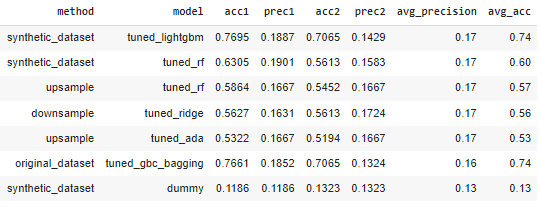

## The results show how difficult is to classify a liked songs vs not liked songs; most importantly it shows how difficult it is to classify or reccomend a **liked** song based on the features available in the spotify api.

## Nonetheless this is consistent with my experience with spotify. There are many weeks when I do not like any of the songs pushed to me spotify's discover weekly playlists. Songs that I chose to like are exceedingly rare. There are many songs that I enjoy to have on, but don't actualy click the liked button, because my threshold for songs I want to save is very high.

##The best classifier was one that was trained on the synthetic dataset (supplmental synthetic samples were added to balance the classes) with an accuracy of 0.74, but a precision of 0.17. Precision was the metric I was focused on because I want the classifier to be able to reliably find songs that I will like. This is a very difficult task, but nonetheless a preicion of 0.17 could be reliable enough. This could mean finding a song i like for every 5-6 songs reccomended, which is actually quite good. Aneetodcelty, this would be an improvement on Spotify's discover weekly reccomendations

## My reccomendations for future work would be futher testing for model robustness, deploying the model in a production environment such as flask, focus on feature engineering, and finding additional features that may have better predictive power than the ones used here.